<a href="https://colab.research.google.com/github/thanadolch/AI_Prototype/blob/main/tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. sequential ง่ายแต่สร้างได้แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)
2. functional
3. subclassing

## Sequential

Import

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Define

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

##train (รวมกับการนำข้อมูลใน colab notebook หน้า)

Predict

In [ ]:
# Call model on a test input
x = tf.ones((4, 4))
y = model(x)

In [ ]:
y

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[-0.02836544, -0.06975604,  0.06978296,  0.06316072],
       [-0.02836544, -0.06975604,  0.06978296,  0.06316072],
       [-0.02836544, -0.06975604,  0.06978296,  0.06316072],
       [-0.02836544, -0.06975604,  0.06978296,  0.06316072]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [ ]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

##สร้าง NN แบบ Sequential สมบูรณ์

In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
 dense_14 (Dense)            (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


##ปรับเปลี่ยน Network

In [ ]:
model2.pop()

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.add(layers.Dense(6))

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
 dense_15 (Dense)            (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Call model on a test input
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[ 0.05503127,  1.2451606 , -0.37361097,  1.8544214 , -1.657348  ,
        -0.5046598 ],
       [ 0.05503127,  1.2451606 , -0.37361097,  1.8544214 , -1.657348  ,
        -0.5046598 ],
       [ 0.05503127,  1.2451606 , -0.37361097,  1.8544214 , -1.657348  ,
        -0.5046598 ],
       [ 0.05503127,  1.2451606 , -0.37361097,  1.8544214 , -1.657348  ,
        -0.5046598 ],
       [ 0.05503127,  1.2451606 , -0.37361097,  1.8544214 , -1.657348  ,
        -0.5046598 ]], dtype=float32)>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

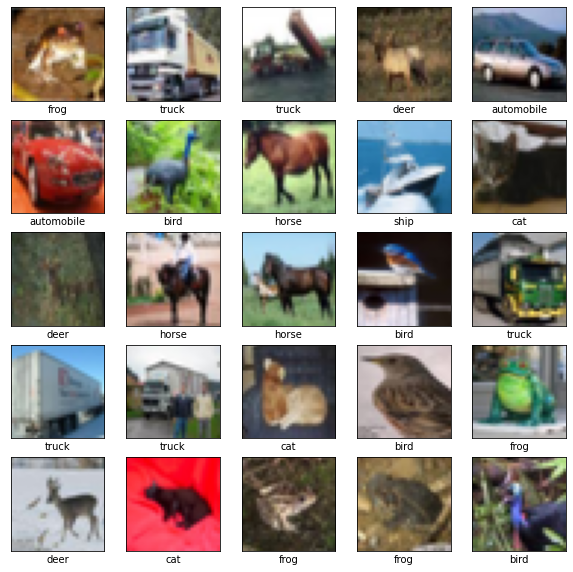

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Define

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

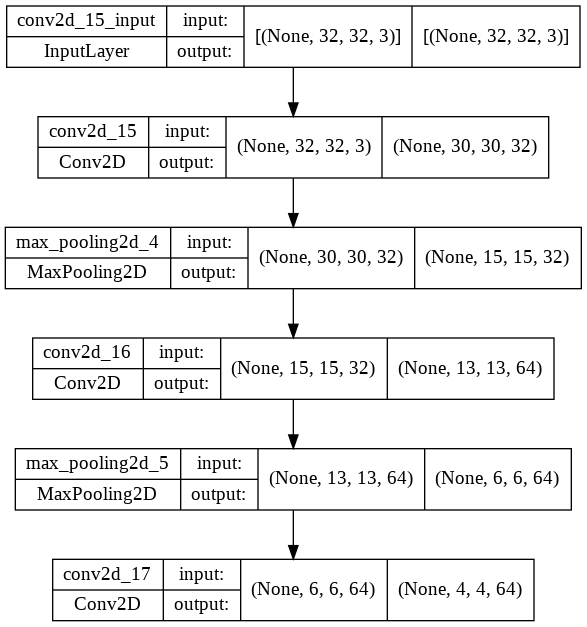

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

ต่อด้วย flatten เพื่อทำนาย

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

Define training parameters

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4778 - accuracy: 0.4633 - val_loss: 1.2259 - val_accuracy: 0.5644
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1017 - accuracy: 0.6111 - val_loss: 1.0888 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9522 - accuracy: 0.6667 - val_loss: 1.0746 - val_accuracy: 0.6303
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8552 - accuracy: 0.6982 - val_loss: 0.9424 - val_accuracy: 0.6734
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7865 - accuracy: 0.7240 - val_loss: 0.9187 - val_accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7292 - accuracy: 0.7459 - val_loss: 0.8624 - val_accuracy: 0.7037
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6701 - accuracy: 0.7651 - val_loss: 0.8474 - val_accurac

313/313 - 1s - loss: 0.8869 - accuracy: 0.7131 - 700ms/epoch - 2ms/step


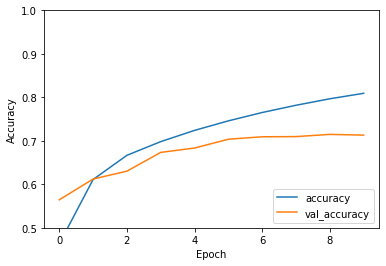

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Functional 

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
input_image = keras.Input(shape=(32,32,3), name="img")
model = layers.Conv2D(32, (3,3), activation='relu', name="conv1")(input_image)
model = layers.MaxPool2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv2")(model)
model = layers.MaxPool2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
output = layers.Dense(10)(model)

In [ ]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

In [ ]:
my_model = keras.Model(input_image,output,name="my_model")

In [ ]:
my_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0  

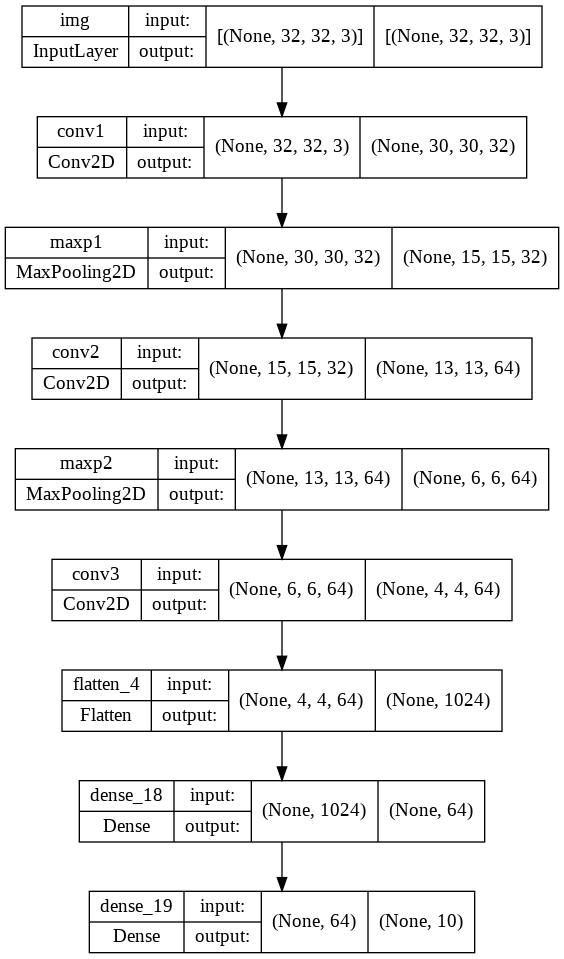

In [ ]:
keras.utils.plot_model(my_model,show_shapes=True)

In [ ]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5491 - accuracy: 0.4319 - val_loss: 1.2623 - val_accuracy: 0.5467
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1684 - accuracy: 0.5858 - val_loss: 1.0649 - val_accuracy: 0.6252
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0183 - accuracy: 0.6437 - val_loss: 0.9963 - val_accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9195 - accuracy: 0.6792 - val_loss: 0.9296 - val_accuracy: 0.6794
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8418 - accuracy: 0.7053 - val_loss: 0.8972 - val_accuracy: 0.6862
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7811 - accuracy: 0.7269 - val_loss: 0.8599 - val_accuracy: 0.7065
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7314 - accuracy: 0.7442 - val_loss: 0.8653 - val_accuracy:

313/313 - 1s - loss: 0.8731 - accuracy: 0.7110 - 730ms/epoch - 2ms/step


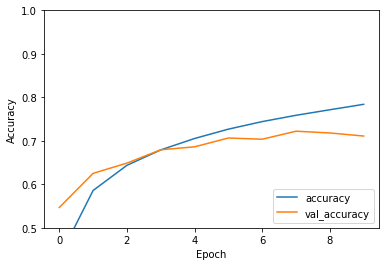

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7110000252723694


#ResNet

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_19 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_18[0][0]']              
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_19[0][0]']              
                                                                                         

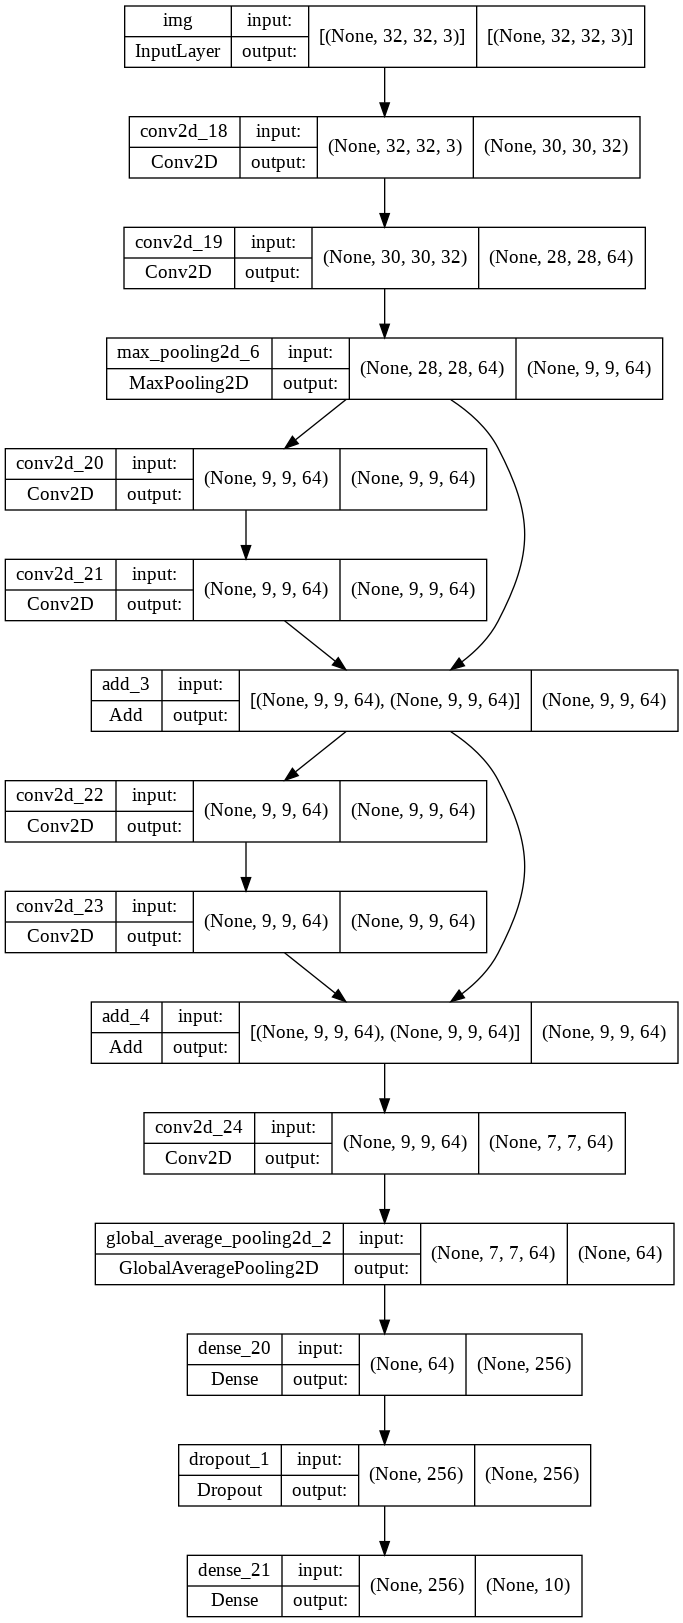

In [ ]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [ ]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history2 = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7118 - accuracy: 0.3434 - val_loss: 1.3527 - val_accuracy: 0.4967
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1990 - accuracy: 0.5654 - val_loss: 1.0558 - val_accuracy: 0.6189
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9846 - accuracy: 0.6522 - val_loss: 0.9512 - val_accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8664 - accuracy: 0.6944 - val_loss: 0.8029 - val_accuracy: 0.7210
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7777 - accuracy: 0.7305 - val_loss: 0.8692 - val_accuracy: 0.7046
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7007 - accuracy: 0.7574 - val_loss: 0.7640 - val_accuracy: 0.7349
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6435 - accuracy: 0.7761 - val_loss: 0.7217 - val_acc

In [ ]:
print(test_acc)

0.7110000252723694


313/313 - 1s - loss: 0.6641 - accuracy: 0.7813 - 942ms/epoch - 3ms/step


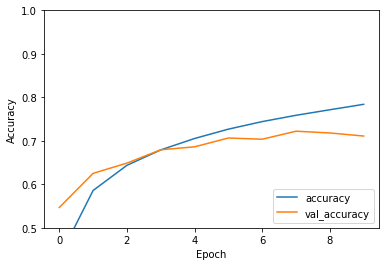

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=2)

# modify my_model ให้มี skip connection แล้ว train-test เทียบกับ my_model และ resnet_model

In [ ]:
input_image2 = keras.Input(shape=(32, 32, 3), name="img2")
x = layers.Conv2D(32, (3,3), activation="relu")(input_image2)
x = layers.Conv2D(64, (3,3), activation="relu")(x)
block1 = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block2 = layers.add([x,block1])

x = layers.Conv2D(64, 3, activation="relu")(block2)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(10)(x)

In [ ]:
my_resnet = keras.Model(input_image2, output, name="my_resnet")
my_resnet.summary()

Model: "my_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img2 (InputLayer)              [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_25 (Conv2D)             (None, 30, 30, 32)   896         ['img2[0][0]']                   
                                                                                                  
 conv2d_26 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_25[0][0]']              
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_26[0][0]']              
                                                                                          

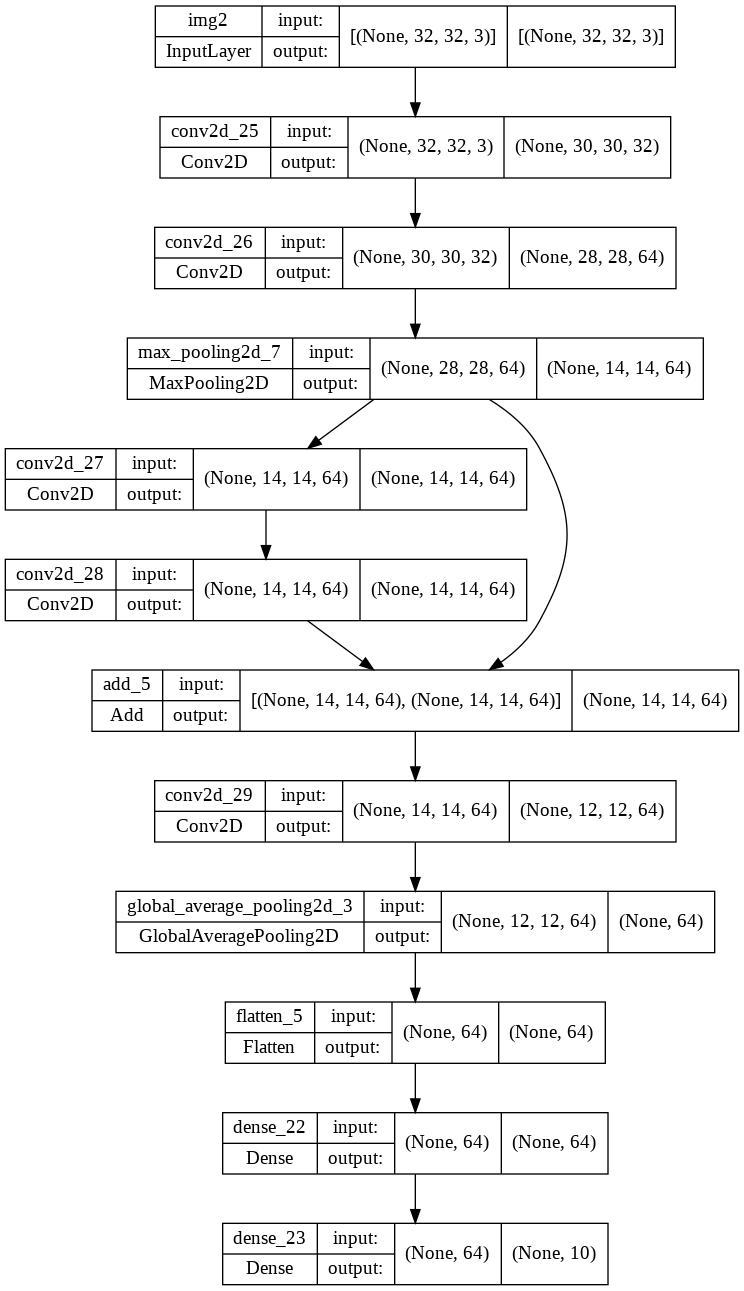

In [ ]:
keras.utils.plot_model(my_resnet,show_shapes=True)

In [ ]:
my_resnet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history3 = my_resnet.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6524 - accuracy: 0.3691 - val_loss: 1.3660 - val_accuracy: 0.4857
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2261 - accuracy: 0.5488 - val_loss: 1.1005 - val_accuracy: 0.5947
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0196 - accuracy: 0.6311 - val_loss: 0.9417 - val_accuracy: 0.6611
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8912 - accuracy: 0.6806 - val_loss: 0.8520 - val_accuracy: 0.6956
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8041 - accuracy: 0.7147 - val_loss: 0.7790 - val_accuracy: 0.7240
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7392 - accuracy: 0.7402 - val_loss: 0.7879 - val_accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6887 - accuracy: 0.7587 - val_loss: 0.7342 - val_accur

313/313 - 1s - loss: 0.6420 - accuracy: 0.7751 - 823ms/epoch - 3ms/step


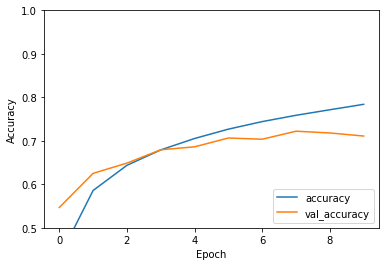

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_resnet.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7750999927520752


#Tensorflow Data Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/My Drive/DQ/DVZ'